# Event Related Potential analysis of LFP data from Auditory Cortex

The purpose of this notebook is to study ERP's in the LFP of auditory cortex. We use the bootstrap statistical procedure to find 95% confidence interval of the average ERP's at each of the presented 32 tones and to quantify whether the tones evoke statistically significant different responses.

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [67]:
#Data downloaded from crcns http://crcns.org/data-sets/ac/ac-2/about-ac-2
data_path='/home/maria/Documents/NeuralDataAnalysis/crcns/ac-2/Anesthetized_wholecell_and_LFP_data/020701md01b/rmat_and_lfpmat.mat'
data=loadmat(data_path)
print(data.keys())
print(data['lfp'].shape)



dict_keys(['__header__', '__version__', '__globals__', 'rbaseline', 'r', 'lfpbaseline', 'lfp'])
(2432, 600)


Data is sampled at 4000 Hz. Each trial is 150 msec, 600 data points.

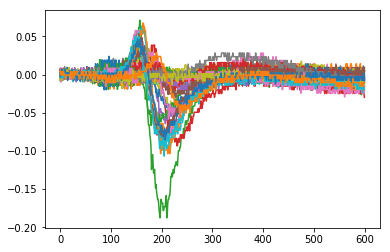

In [72]:
#Plot the LFP across 32 different presented tones for one block.
for j in range(0,32):
    plt.plot(range(0,600),data['lfp'][j,:])

In [75]:
#Divide the responses into groups according to the stimulus that was presented
resp_lst=[]
for stim in range(0,32):
    resp=data['lfp'][stim::32,:]
    
    resp_lst.append(resp)
print(resp.shape)

(76, 600)


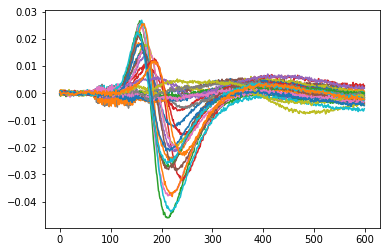

In [71]:
#Plot average responses for each stimulus.
for resp_stim in resp_lst:
    av_time_course=np.mean(resp_stim,axis=0)
    plt.plot(range(0,600),av_time_course)
    #plt.show()

(600,)


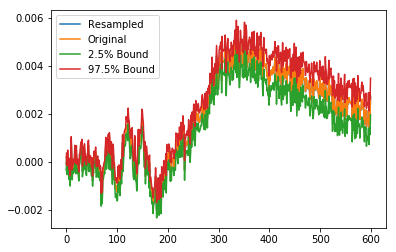

In [80]:
def bootstrap_for_one_stimulus(data):
    '''
    Compute bootstrapped confidence interval for one stimulus.
    '''
    erp_dist=[]
    for j in range(0,3000):
    #sample one trial randomly
        random_trial=np.random.randint(0,76,1000)
        resampled_data=data[random_trial]
        #print(resampled_data.shape)
        mean_resamp=np.mean(resampled_data,axis=0)
        erp_dist.append(mean_resamp)
    erp_dist=np.array(erp_dist)
    #Percentiles
    conf_lower=np.percentile(erp_dist,2.5,axis=0)
    print(conf_lower.shape)
    conf_upper=np.percentile(erp_dist,97.5,axis=0)
    plt.plot(range(0,600),np.mean(erp_dist,axis=0),label='Resampled')
    plt.plot(range(0,600),np.mean(data,axis=0),label='Original')
    plt.plot(range(0,600),conf_lower,label='2.5% Bound')
    plt.plot(range(0,600),conf_upper,label='97.5% Bound')
    plt.legend()
    plt.show()
    
bootstrap_for_one_stimulus(resp_lst[0])

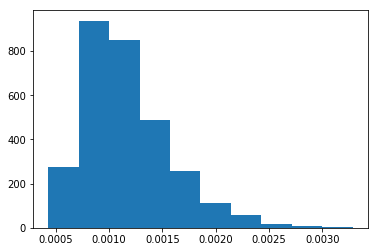

reject null


In [85]:
def bootstrap_for_comparison(data0,data1):
    concatenated_data=np.vstack((data0,data1))
    distr_of_statistics=[]
    for j in range(0,3000):
        random_trial0=np.random.randint(0,152,1000)
        resampled_data0=concatenated_data[random_trial0]
        mean_resamp_data0=np.mean(resampled_data0,axis=0)
        random_trial1=np.random.randint(0,152,1000)
        resampled_data1=concatenated_data[random_trial1]
        mean_resamp_data1=np.mean(resampled_data1,axis=0)
        statistic=np.max(np.abs(mean_resamp_data0-mean_resamp_data1))
        distr_of_statistics.append(statistic)
    plt.hist(distr_of_statistics)
    plt.show()
    threshold=np.percentile(distr_of_statistics,95)
    actual_statistic=np.max(np.abs(np.mean(data0,axis=0)-np.mean(data1,axis=0)))
    if actual_statistic>threshold:
        decision='reject null'
    else:
        decision='confirm null'
    return decision

decision=bootstrap_for_comparison(resp_lst[0],resp_lst[1])

print(decision)


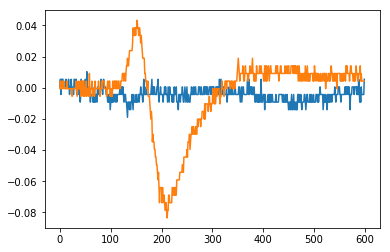

In [81]:
for j in range(0,2):
    plt.plot(range(0,600),data['lfp'][j,:])